# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D

# 1. Load and clean debt.csv
debt = pd.read_csv("./data/debt/debt.csv")
debt.replace("no data", pd.NA, inplace=True)
debt = debt.rename(columns={"Central Government Debt (Percent of GDP)": "Country"})
debt = debt[["Country", "2023"]].dropna()
debt["2023"] = pd.to_numeric(debt["2023"], errors="coerce")
debt = debt.rename(columns={"2023": "Debt"})
debt["Country"] = debt["Country"].str.strip().str.lower()



tax_revenue = pd.read_csv("./data/tax_revenue/tax_revenue.csv")
tax_revenue.replace("no data", pd.NA, inplace=True)
tax_revenue= tax_revenue.rename(columns={"Government revenue, percent of GDP (% of GDP)": "Country"})

tax_revenue = tax_revenue[["Country", "2023"]].dropna()
tax_revenue["2023"] = pd.to_numeric(tax_revenue["2023"], errors="coerce")
tax_revenue = tax_revenue.rename(columns={"2023": "Tax_revenue"})
tax_revenue["Country"] = tax_revenue["Country"].str.strip().str.lower()


# 2. Helper function
def clean_world_bank_csv(path, indicator_name):
    df = pd.read_csv(path, skiprows=4)
    df = df[["Country Name", "2023"]].dropna()
    df = df.rename(columns={"Country Name": "Country", "2023": indicator_name})
    df[indicator_name] = pd.to_numeric(df[indicator_name], errors="coerce")
    df["Country"] = df["Country"].str.strip().str.lower()
    return df

# 3. Load other datasets
unem = clean_world_bank_csv("./data/unemploy/unemploy.csv","Unemployment")
gdp = clean_world_bank_csv("./data/GDP_per/GDP_per_capita.csv", "GDP_per_capita")
gni = clean_world_bank_csv("./data/GNI/GNI_per_capita.csv", "GNI_per_capita")
pop = clean_world_bank_csv("./data/population/population.csv", "Population")
inflation = clean_world_bank_csv("./data/inflation/inflation.csv","Inflation")
interest = clean_world_bank_csv("./data/interest/interest.csv","Interest")


# 4. Filter to matching countries
unem = unem[unem["Country"].isin(debt["Country"])]
gdp = gdp[gdp["Country"].isin(debt["Country"])]
gni = gni[gni["Country"].isin(debt["Country"])]
pop = pop[pop["Country"].isin(debt["Country"])]
inflation = inflation[inflation["Country"].isin(debt["Country"])]
interest = interest[interest["Country"].isin(debt["Country"])]

# 5. Merge all
df = debt.merge(gdp, on="Country") \
        .merge(gni, on="Country") \
        .merge(pop, on="Country") \
        .merge(unem, on="Country") \
        .merge(inflation, on="Country")   \
        .merge(tax_revenue, on="Country") 
        
        
df = df.dropna()
df = df[(df["GDP_per_capita"] > 0) & (df["GNI_per_capita"] > 0) & (df["Population"] > 0)& (df["Unemployment"] > 0)]

# 6. Add income category
def categorize_income(gdp):
    if gdp < 1085:
        return "Low income"
    elif gdp <= 4255:
        return "Lower-middle income"
    elif gdp <= 13205:
        return "Upper-middle income"
    else:
        return "High income"

df["Income_Category"] = df["GDP_per_capita"].apply(categorize_income)

# 7. Take top 5 by GDP per capita per category
df_top = df.groupby("Income_Category").apply(lambda x: x.nlargest(5, "GDP_per_capita")).reset_index(drop=True)

# 8. Plot
plt.figure(figsize=(12, 8))
cmap = plt.cm.Blues

# Assign outline color per category
outline_colors = {
    "Low income": "red",
    "Lower-middle income": "blue",
    "Upper-middle income": "green",
    "High income": "purple"
}



C:\Users\seans\AppData\Local\Temp\ipykernel_47636\2157234864.py:80: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top = df.groupby("Income_Category").apply(lambda x: x.nlargest(5, "GDP_per_capita")).reset_index(drop=True)


<Figure size 1200x800 with 0 Axes>

C:\Users\seans\AppData\Local\Temp\ipykernel_47636\1732040545.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.92])
C:\Users\seans\AppData\Local\Temp\ipykernel_47636\1732040545.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Reserve space for colorbar and title


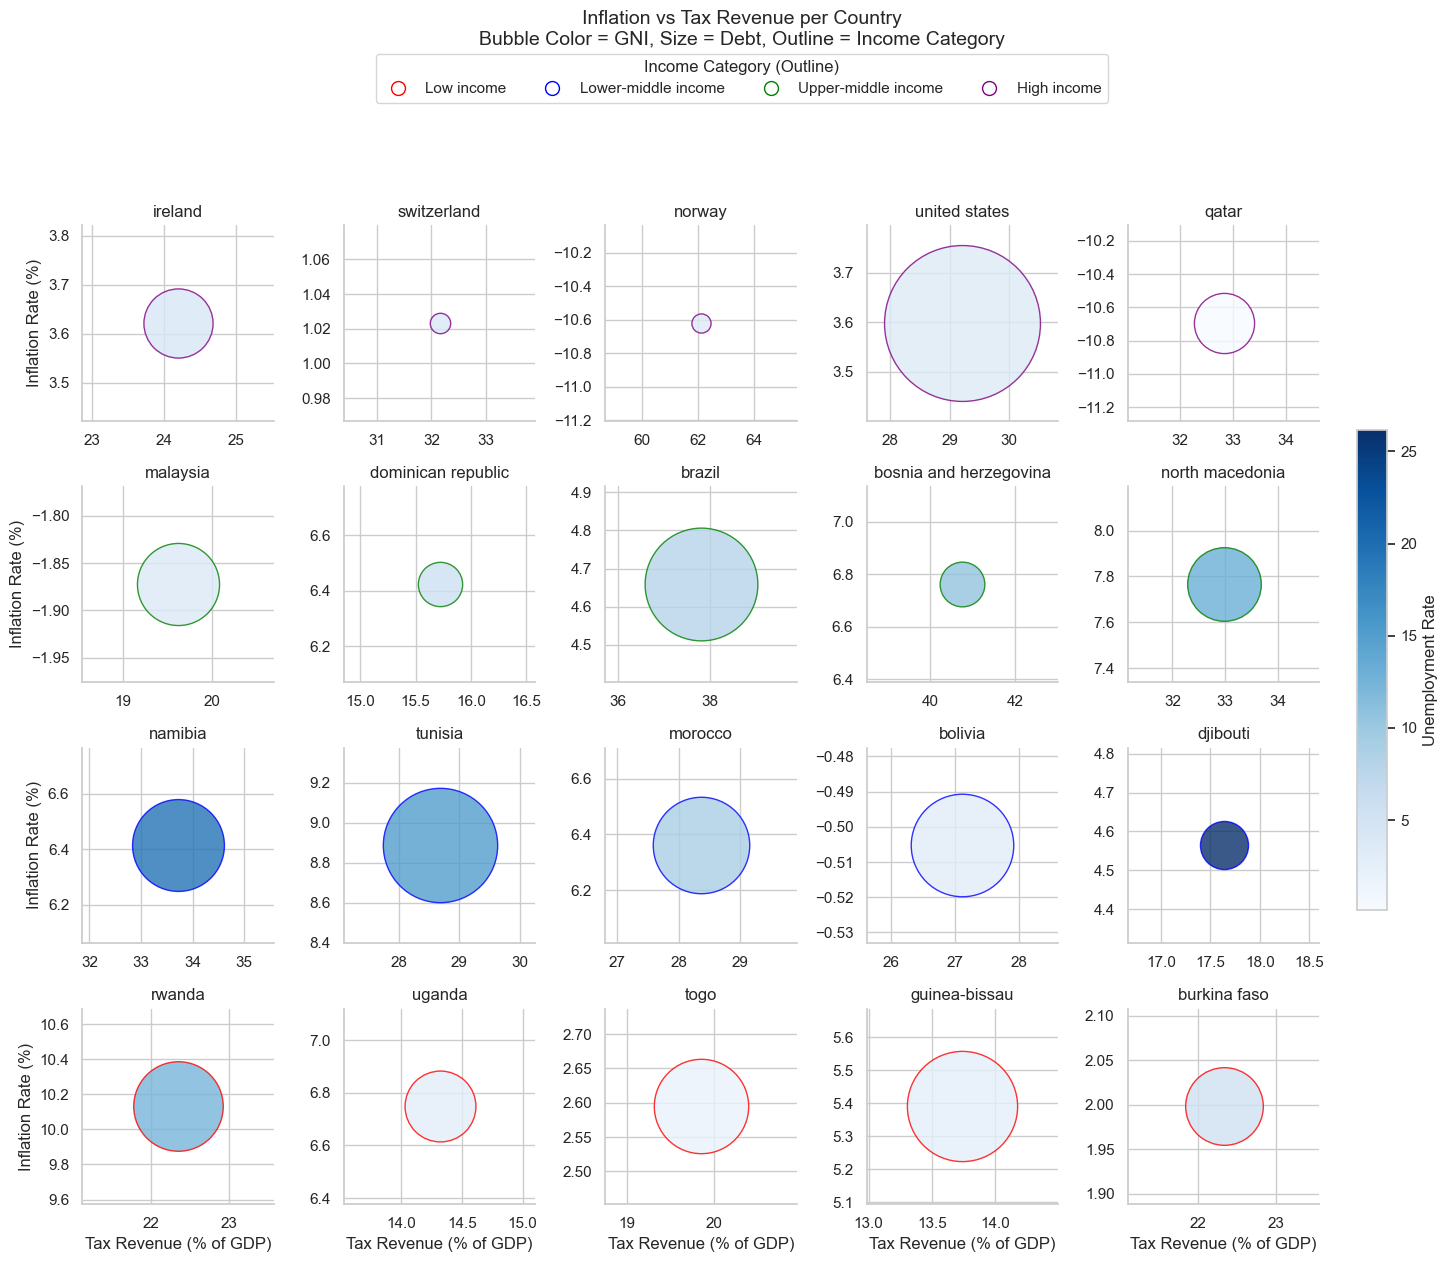

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import numpy as np

# Prepare data

plot_data = df_top.copy().sort_values("GDP_per_capita", ascending=False)

plot_data["Debt_Sqrt"] = (plot_data["Debt"] ** 0.5) * 2  # Bubble size from Debt
plot_data["Outline"] = plot_data["Income_Category"].map(outline_colors)
# Sort data by GDP per capita

# Normalize GNI for consistent colormap
norm = Normalize(vmin=plot_data["Unemployment"].min(), vmax=plot_data["Unemployment"].max())
cmap = plt.cm.Blues

# Setup FacetGrid
g = sns.FacetGrid(
    plot_data,
    col="Country",
    col_wrap=5,
    height=3,
    aspect=1,
    sharex=False,
    sharey=False
)

# Function to plot per facet
def facet_bubble(data, **kwargs):
    sc = plt.scatter(
        data["Tax_revenue"],
        data["Inflation"],
        s=data["Debt"]**2,
        c=cmap(norm(data["Unemployment"])),
        alpha=0.8,
        edgecolors=data["Outline"],
        linewidths=1
    )

g.map_dataframe(facet_bubble)

# Add single shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
g.fig.subplots_adjust(right=0.88)  # Make space on right
cbar_ax = g.fig.add_axes([0.91, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = g.fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Unemployment Rate")

# Axis labels and titles
g.set_axis_labels("Tax Revenue (% of GDP)", "Inflation Rate (%)")
g.set_titles("{col_name}")
g.fig.suptitle(
    "Inflation vs Tax Revenue per Country\nBubble Color = GNI, Size = Debt, Outline = Income Category",
    fontsize=14,
    y=1.05  # Raise the title a bit
)

# Move outline legend slightly lower to avoid overlapping with the title
g.fig.legend(
    handles=custom_legend,
    title="Income Category (Outline)",
    loc='upper center',
    ncol=4,
    bbox_to_anchor=(0.5, 1.02)  # Lower it from y=1.05
)

# Adjust layout — give more top space
plt.tight_layout(rect=[0, 0, 0.9, 0.92])
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Reserve space for colorbar and title
plt.show()


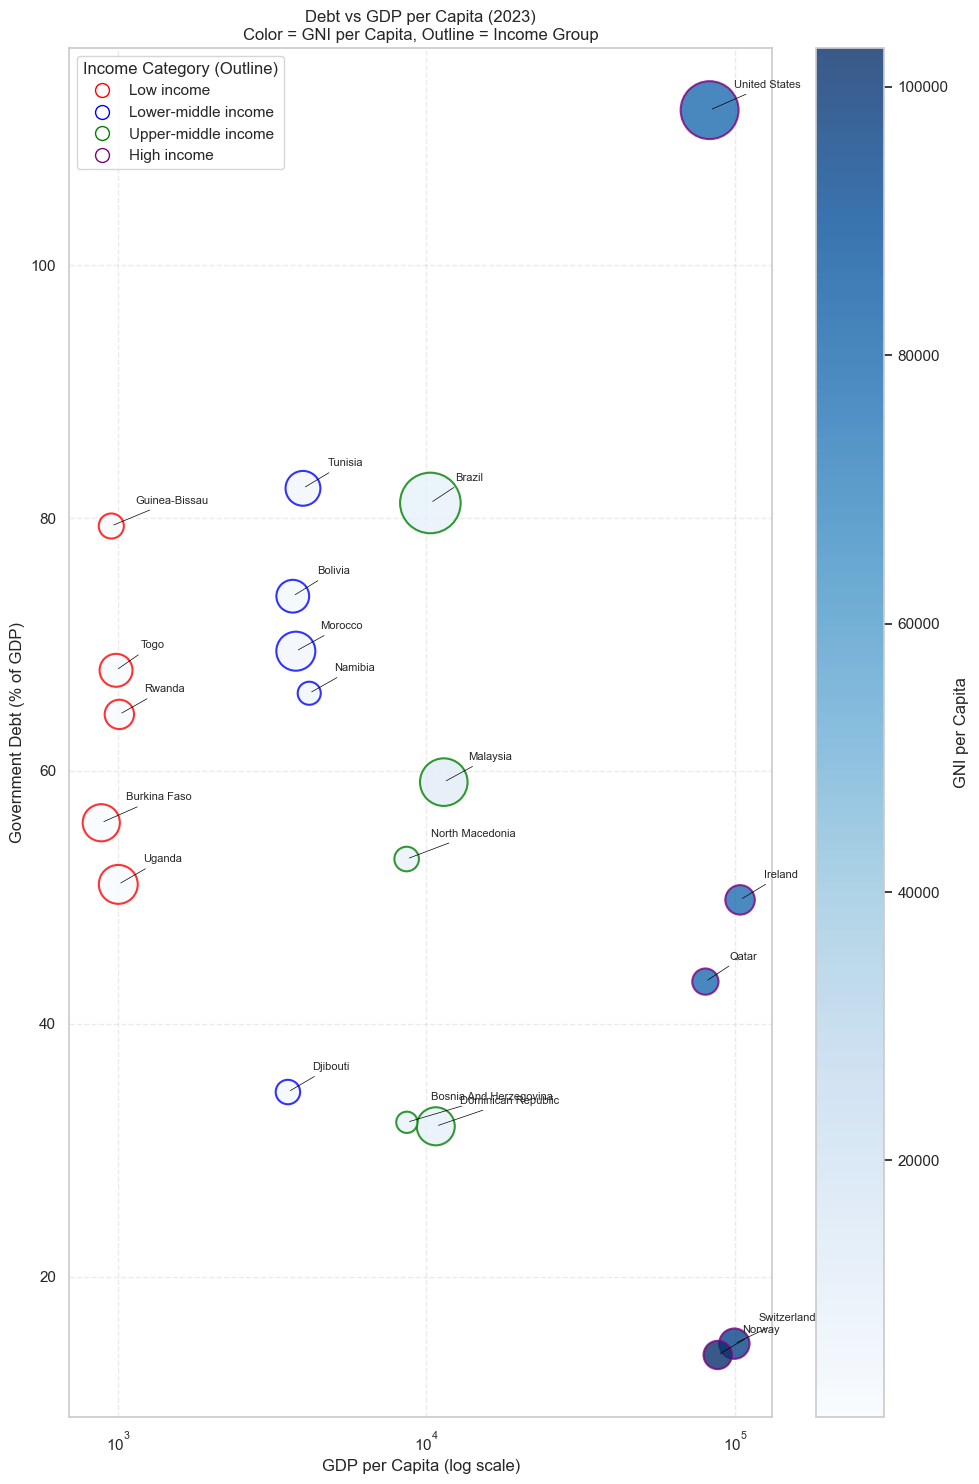

In [ ]:
plt.figure(figsize=(10, 15))
cmap = plt.cm.Blues
scatter = plt.scatter(
    df_top["GDP_per_capita"],
    df_top["Debt"],
    s=(df_top["Population"]** 0.5)/2.5,
    c=df_top["GNI_per_capita"],           # ✅ Color by GNI
    cmap=cmap,
    alpha=0.8,
    edgecolors=df_top["Income_Category"].map(outline_colors),
    linewidths=1.5
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("GNI per Capita")

# Axis & labels
plt.xscale("log")
plt.xlabel("GDP per Capita (log scale)")
plt.ylabel("Government Debt (% of GDP)")
plt.title("Debt vs GDP per Capita (2023)\nColor = GNI per Capita, Outline = Income Group")
plt.grid(True, linestyle="--", alpha=0.4)

# Optional annotations
for i, row in df_top.iterrows():
    
    plt.annotate(
        row["Country"].title(),
        xy=(row["GDP_per_capita"], row["Debt"]),          # Point to the bubble
        xytext=(row["GDP_per_capita"]*1.2, row["Debt"]+2), # Label a bit offset to the right
        textcoords='data',
        fontsize=8,
        ha='left',
        va='center',
        arrowprops=dict(arrowstyle='-', color='black', lw=0.5)  # Line from label to bubble
    )

# Custom legend for outlines
from matplotlib.lines import Line2D
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label=cat,
           markerfacecolor='white', markeredgecolor=color,
           markersize=10, lw=0.5)
    for cat, color in outline_colors.items()
]
plt.legend(handles=custom_legend, title="Income Category (Outline)")

plt.tight_layout()
plt.show()

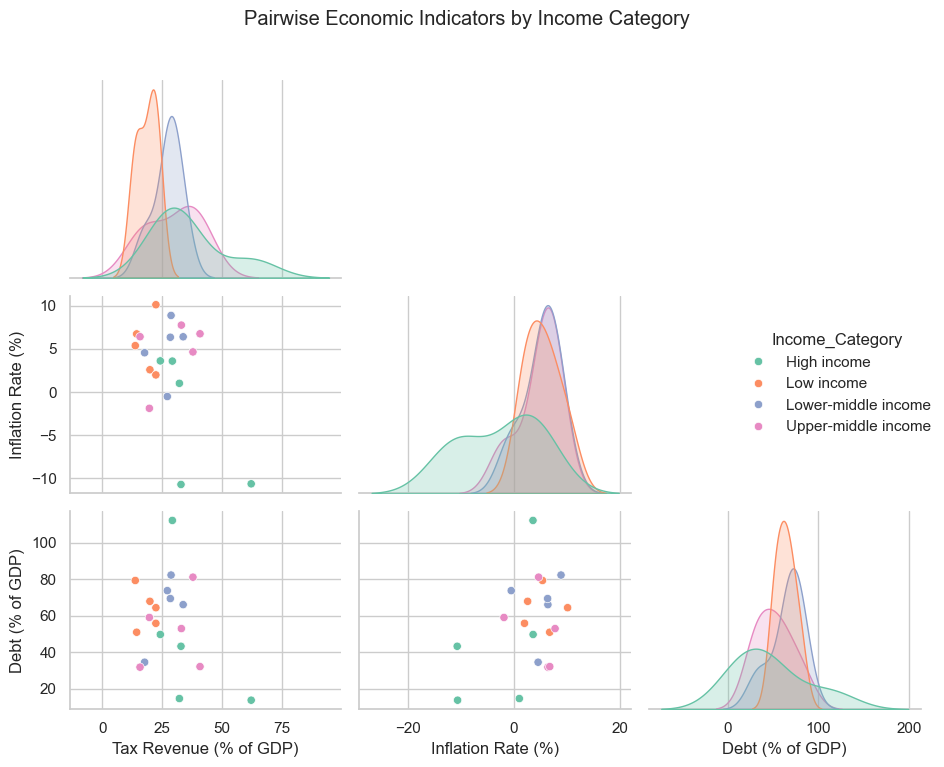

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
pairplot_data = df_top[[
    "Tax_revenue",
    "Inflation",
    "Debt",
    "Income_Category"
]].copy()

# Rename columns for clearer plot labels
pairplot_data = pairplot_data.rename(columns={
    "Tax_revenue": "Tax Revenue (% of GDP)",
    "Inflation": "Inflation Rate (%)",
    "Debt": "Debt (% of GDP)"
})

# Plot
sns.set(style="whitegrid")
sns.pairplot(pairplot_data, hue="Income_Category", palette="Set2", corner=True)
plt.suptitle("Pairwise Economic Indicators by Income Category", y=1.02)
plt.tight_layout()
plt.show()



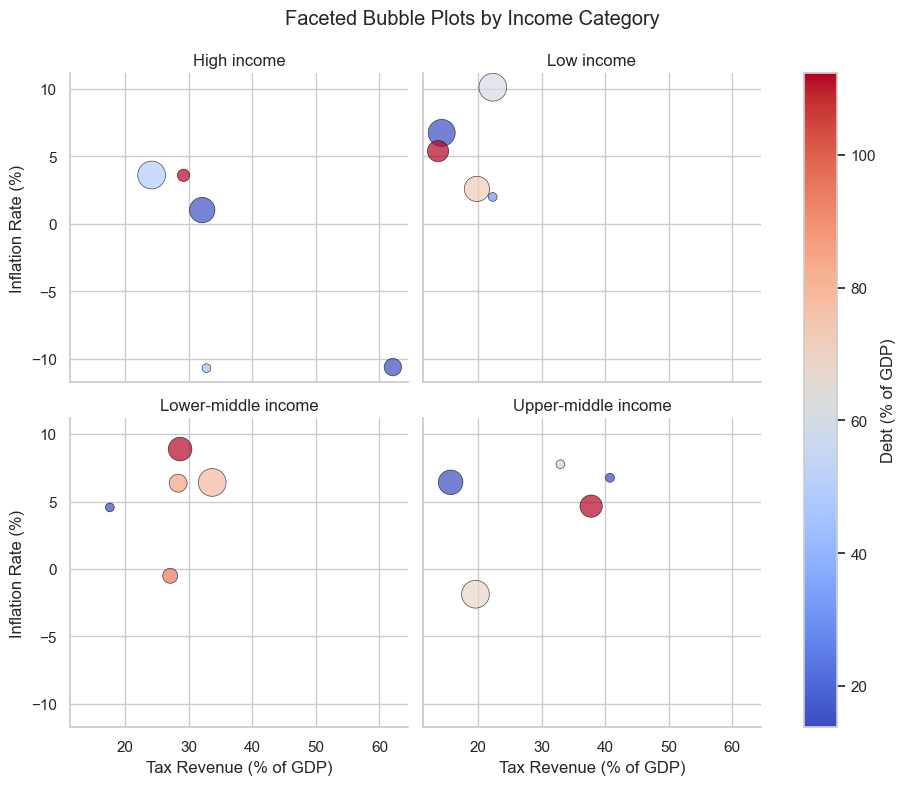

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setup FacetGrid without hue
g = sns.FacetGrid(df_top, col="Income_Category", col_wrap=2, height=4, aspect=1.2)

# Add scatterplot with hue and size inside map_dataframe
g.map_dataframe(
    sns.scatterplot,
    x="Tax_revenue",
    y="Inflation",
    hue="Debt",                      # Move hue here
    size="GDP_per_capita",          # Bubble size
    sizes=(40, 400),
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5,
    palette="coolwarm",
    legend=False                    # We’ll manually handle legend later
)

# Set axis labels
g.set_axis_labels("Tax Revenue (% of GDP)", "Inflation Rate (%)")
g.set_titles("{col_name}")

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Faceted Bubble Plots by Income Category")

# Create a colorbar for Debt
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import numpy as np

norm = plt.Normalize(df_top["Debt"].min(), df_top["Debt"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = g.fig.colorbar(sm, ax=g.axes, orientation="vertical", label="Debt (% of GDP)")

plt.show()


C:\Users\seans\AppData\Local\Temp\ipykernel_47636\1457259046.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.92])
C:\Users\seans\AppData\Local\Temp\ipykernel_47636\1457259046.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Reserve space for colorbar and title


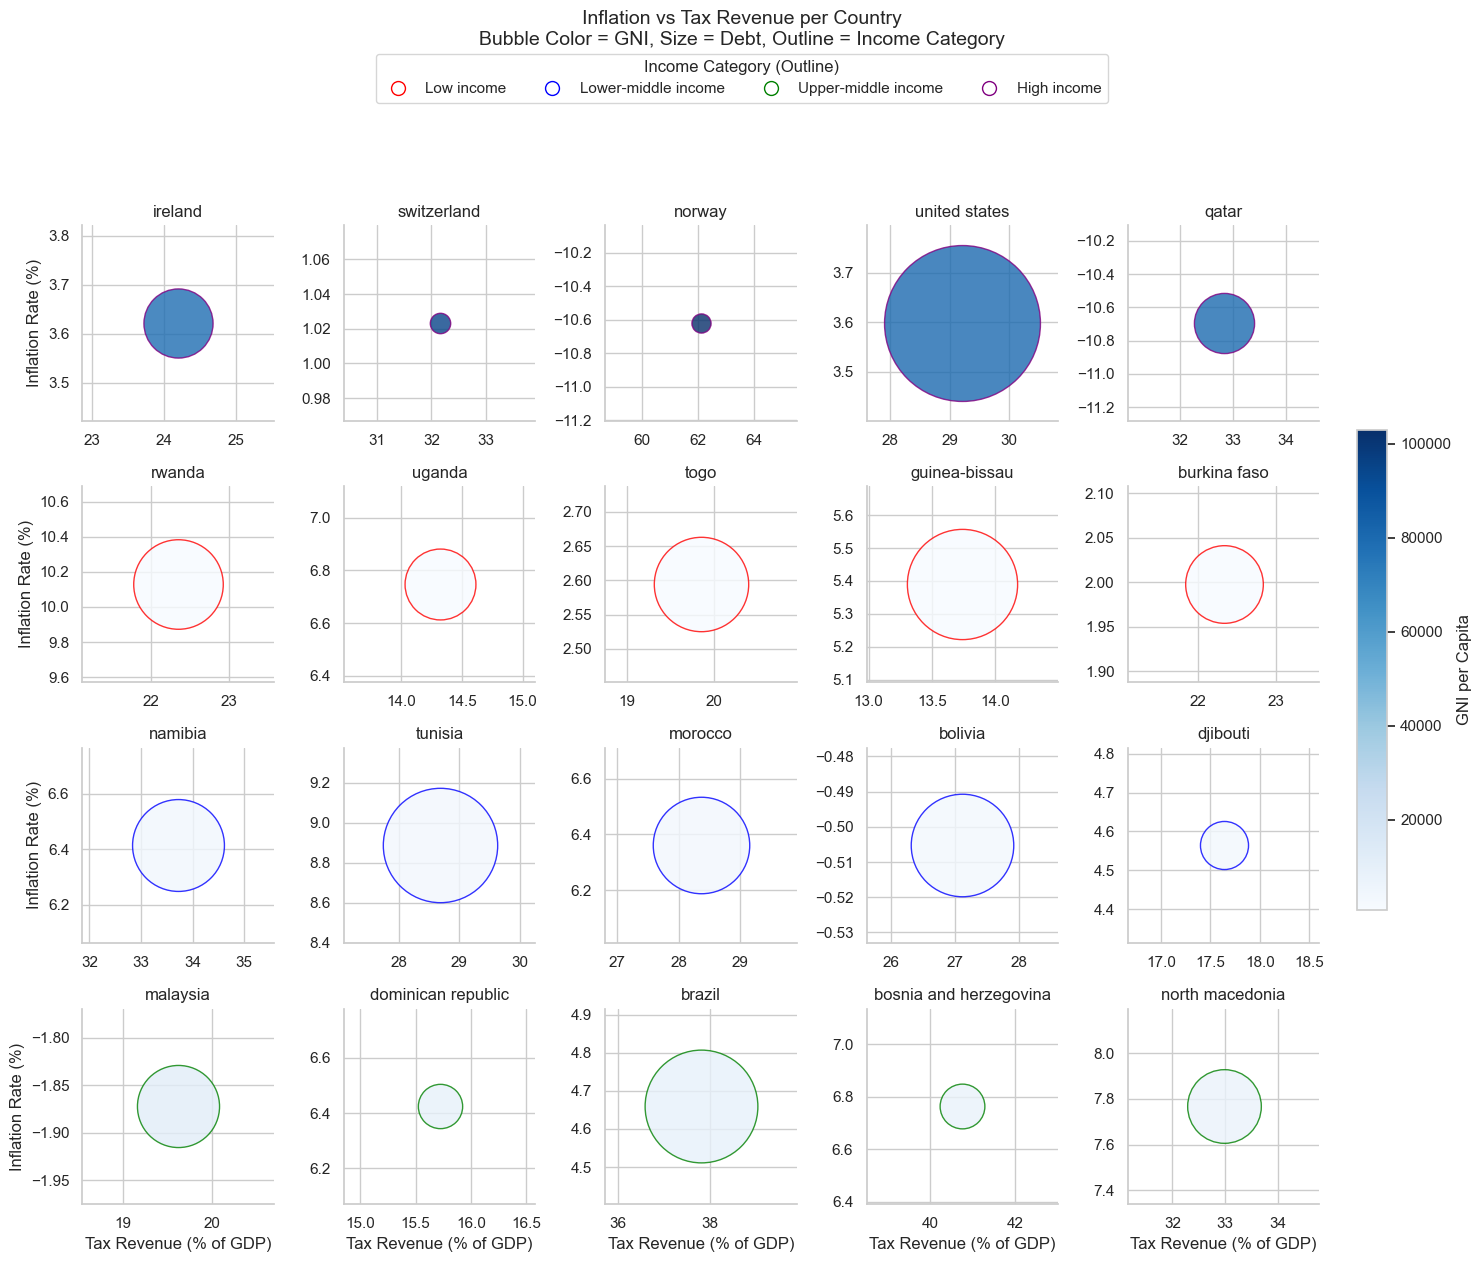

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import numpy as np

# Prepare data
plot_data = df_top.copy()
plot_data["Debt_Sqrt"] = (plot_data["Debt"] ** 0.5) * 2  # Bubble size from Debt
plot_data["Outline"] = plot_data["Income_Category"].map(outline_colors)

# Normalize GNI for consistent colormap
norm = Normalize(vmin=plot_data["GNI_per_capita"].min(), vmax=plot_data["GNI_per_capita"].max())
cmap = plt.cm.Blues

# Setup FacetGrid
g = sns.FacetGrid(
    plot_data,
    col="Country",
    col_wrap=5,
    height=3,
    aspect=1,
    sharex=False,
    sharey=False
)

# Function to plot per facet
def facet_bubble(data, **kwargs):
    sc = plt.scatter(
        data["Tax_revenue"],
        data["Inflation"],
        s=data["Debt"]**2,
        c=cmap(norm(data["GNI_per_capita"])),
        alpha=0.8,
        edgecolors=data["Outline"],
        linewidths=1
    )

g.map_dataframe(facet_bubble)

# Add single shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
g.fig.subplots_adjust(right=0.88)  # Make space on right
cbar_ax = g.fig.add_axes([0.91, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = g.fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("GNI per Capita")

# Axis labels and titles
g.set_axis_labels("Tax Revenue (% of GDP)", "Inflation Rate (%)")
g.set_titles("{col_name}")
g.fig.suptitle(
    "Inflation vs Tax Revenue per Country\nBubble Color = GNI, Size = Debt, Outline = Income Category",
    fontsize=14,
    y=1.05  # Raise the title a bit
)

# Move outline legend slightly lower to avoid overlapping with the title
g.fig.legend(
    handles=custom_legend,
    title="Income Category (Outline)",
    loc='upper center',
    ncol=4,
    bbox_to_anchor=(0.5, 1.02)  # Lower it from y=1.05
)

# Adjust layout — give more top space
plt.tight_layout(rect=[0, 0, 0.9, 0.92])
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Reserve space for colorbar and title
plt.show()


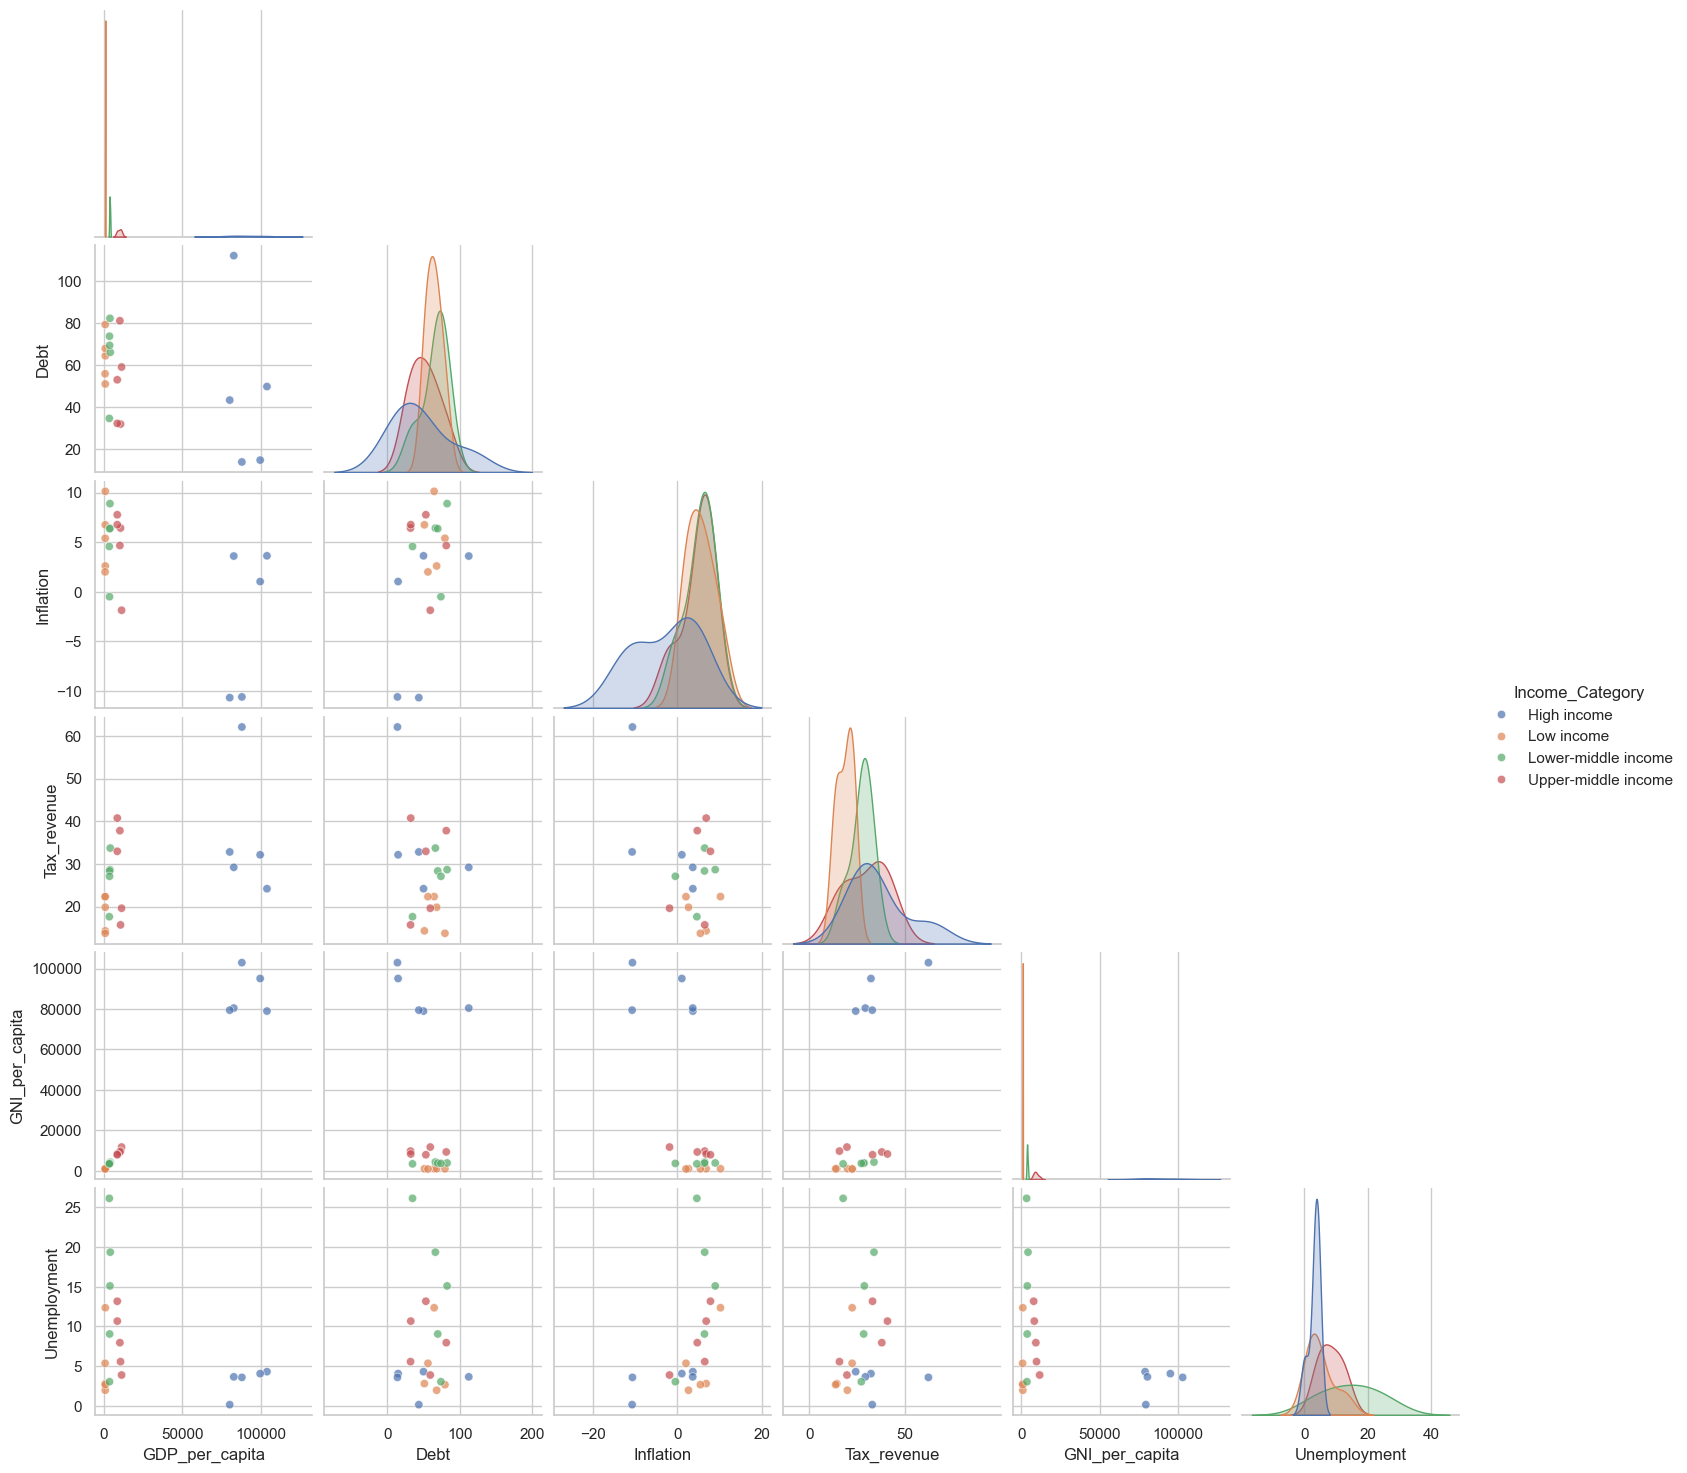

In [ ]:
sns.pairplot(
    df_top,
    vars=["GDP_per_capita", "Debt", "Inflation", "Tax_revenue", "GNI_per_capita","Unemployment"],
    hue="Income_Category",
    corner=True,
    plot_kws={"alpha": 0.7}
)


<Axes: >

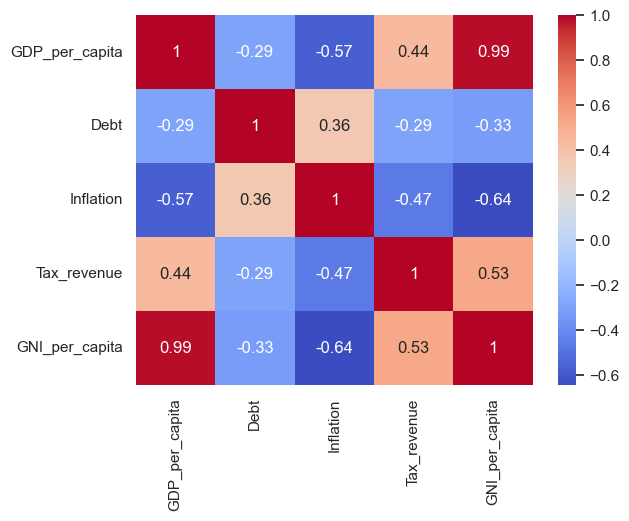

In [ ]:
import seaborn as sns
corr = df_top[["GDP_per_capita", "Debt", "Inflation", "Tax_revenue", "GNI_per_capita"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")


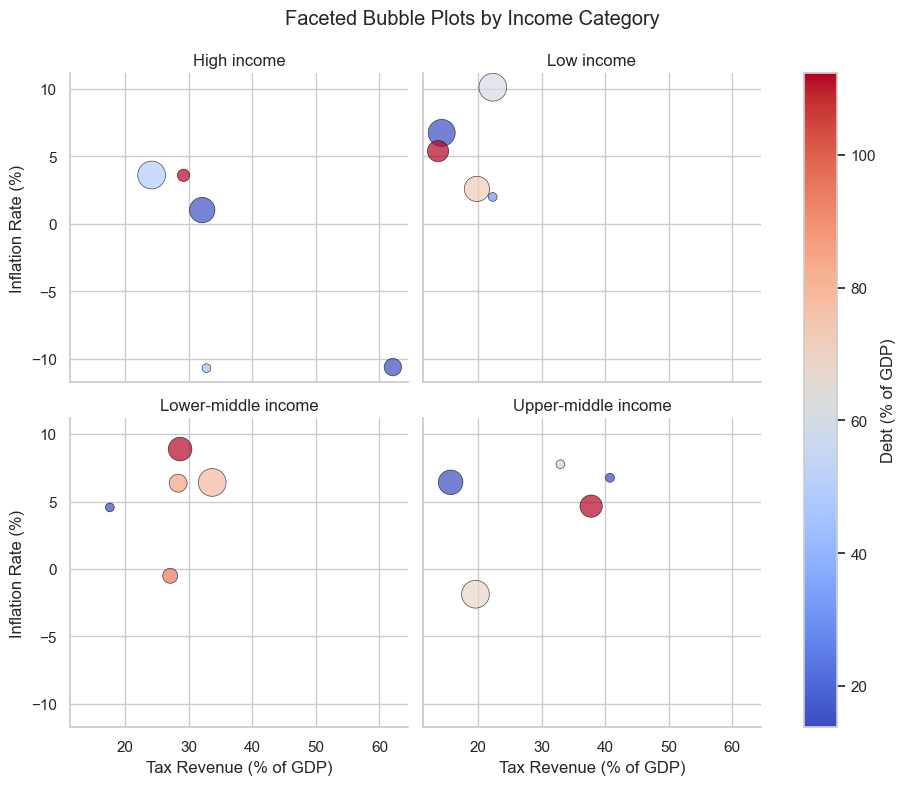

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setup FacetGrid without hue
g = sns.FacetGrid(df_top, col="Income_Category", col_wrap=2, height=4, aspect=1.2)

# Add scatterplot with hue and size inside map_dataframe
g.map_dataframe(
    sns.scatterplot,
    x="Tax_revenue",
    y="Inflation",
    hue="Debt",                      # Move hue here
    size="GDP_per_capita",          # Bubble size
    sizes=(40, 400),
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5,
    palette="coolwarm",
    legend=False                    # We’ll manually handle legend later
)

# Set axis labels
g.set_axis_labels("Tax Revenue (% of GDP)", "Inflation Rate (%)")
g.set_titles("{col_name}")

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Faceted Bubble Plots by Income Category")

# Create a colorbar for Debt
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar
import numpy as np

norm = plt.Normalize(df_top["Debt"].min(), df_top["Debt"].max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = g.fig.colorbar(sm, ax=g.axes, orientation="vertical", label="Debt (% of GDP)")

plt.show()


KeyError: 'Outline'

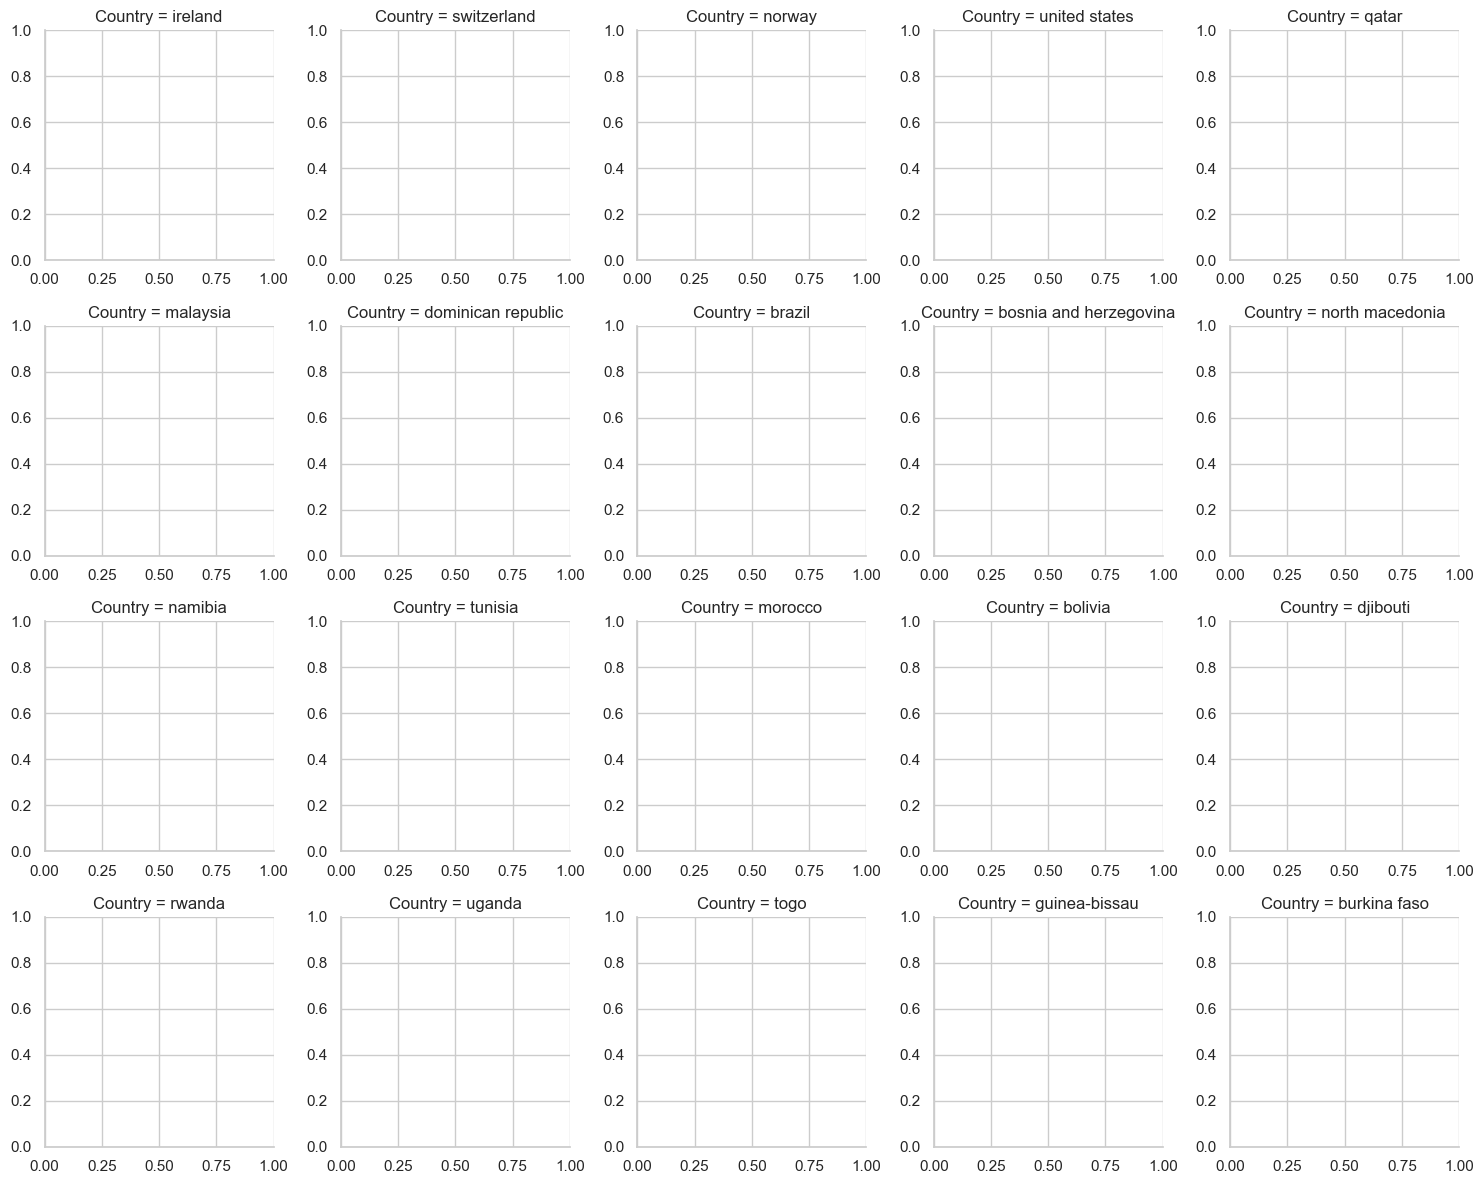

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import Normalize
import numpy as np

# Prepare data
plot_data = df_top.copy()
plot_data["Debt_Sqrt"] = (plot_data["Debt"] ** 0.5) * 2  # Bubble size from Debt
plot_data["Outline"] = plot_data["Income_Category"].map(outline_colors)

# Normalize GNI for consistent colormap
norm = Normalize(vmin=plot_data["Unemployment"].min(), vmax=plot_data["Unemployment"].max())
cmap = plt.cm.Blues

# Setup FacetGrid
g = sns.FacetGrid(
    plot_data,
    col="Country",
    col_wrap=5,
    height=3,
    aspect=1,
    sharex=False,
    sharey=False
)

# Function to plot per facet
def facet_bubble(data, **kwargs):
    sc = plt.scatter(
        data["Tax_revenue"],
        data["Inflation"],
        s=data["Debt"]**2,
        c=cmap(norm(data["Unemployment"])),
        alpha=0.8,
        edgecolors=data["Outline"],
        linewidths=1
    )

g.map_dataframe(facet_bubble)

# Add single shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Dummy array for colorbar
g.fig.subplots_adjust(right=0.88)  # Make space on right
cbar_ax = g.fig.add_axes([0.91, 0.3, 0.02, 0.4])  # [left, bottom, width, height]
cbar = g.fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Unemployment Rate")

# Axis labels and titles
g.set_axis_labels("Tax Revenue (% of GDP)", "Inflation Rate (%)")
g.set_titles("{col_name}")
g.fig.suptitle(
    "Inflation vs Tax Revenue per Country\nBubble Color = GNI, Size = Debt, Outline = Income Category",
    fontsize=14,
    y=1.05  # Raise the title a bit
)

# Move outline legend slightly lower to avoid overlapping with the title
g.fig.legend(
    handles=custom_legend,
    title="Income Category (Outline)",
    loc='upper center',
    ncol=4,
    bbox_to_anchor=(0.5, 1.02)  # Lower it from y=1.05
)

# Adjust layout — give more top space
plt.tight_layout(rect=[0, 0, 0.9, 0.92])
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Reserve space for colorbar and title
plt.show()


C:\Users\seans\AppData\Local\Temp\ipykernel_47636\1790748946.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


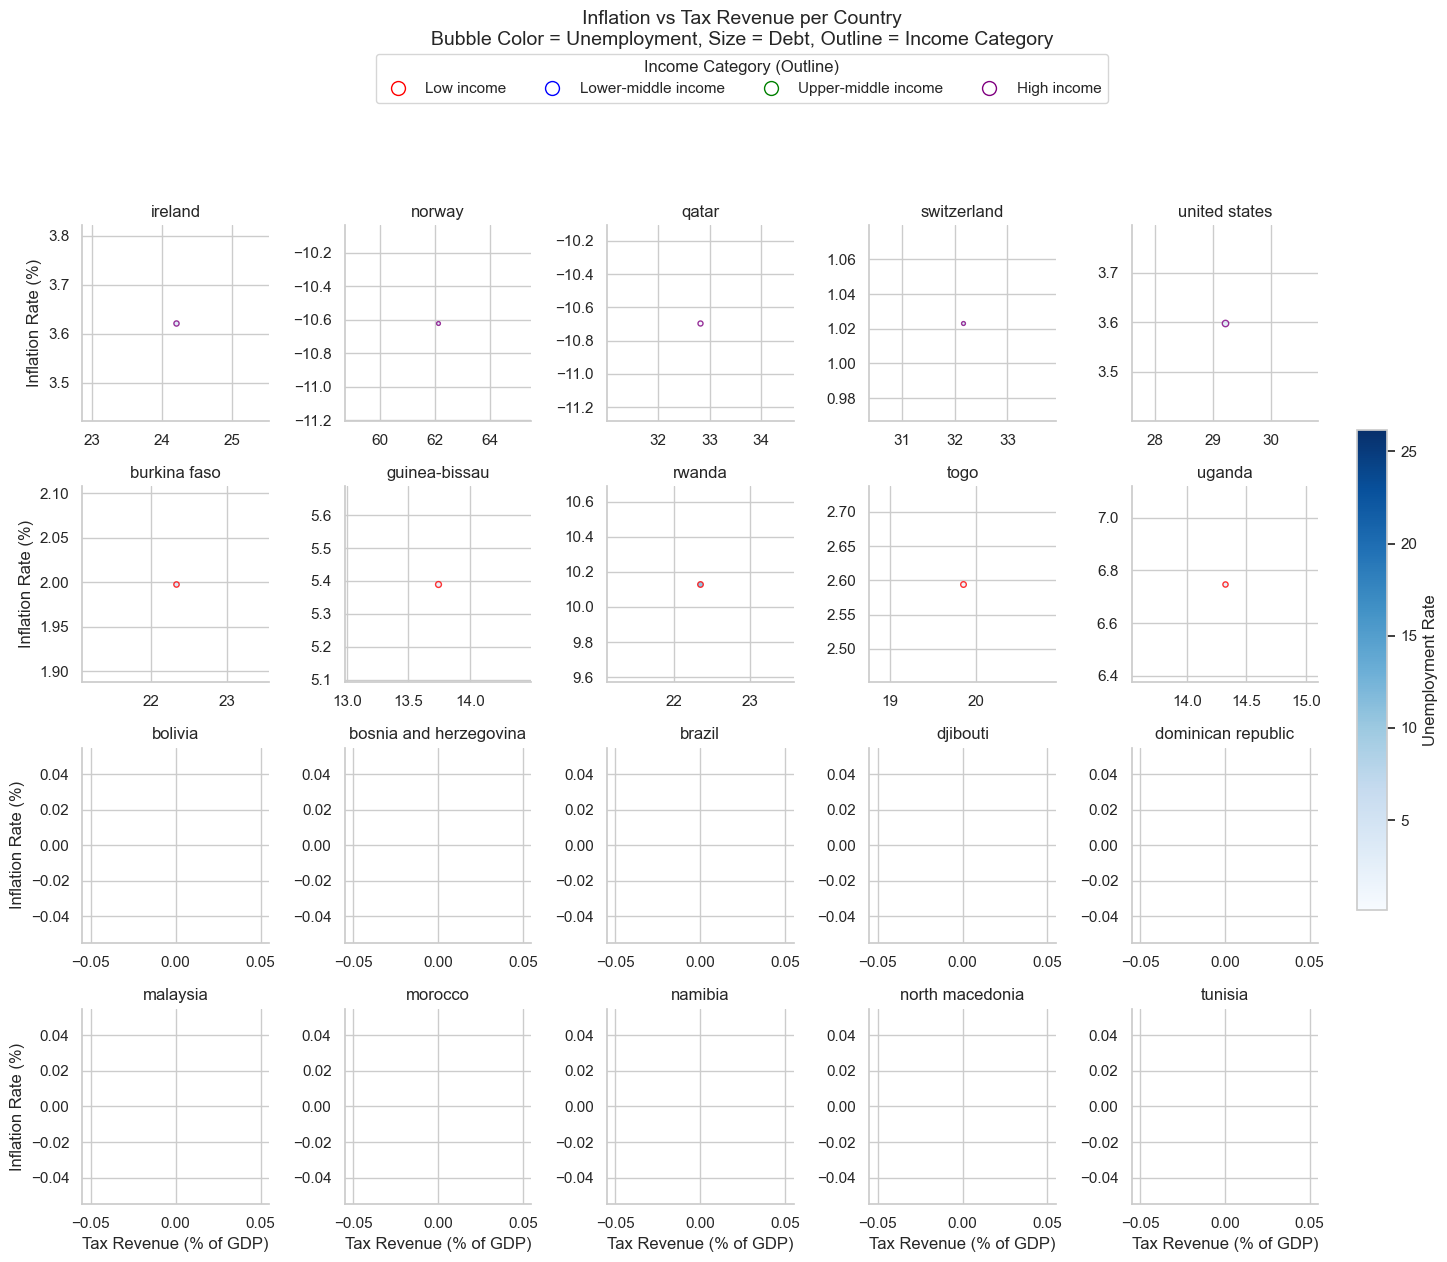